features: tensor([ 2.0996, -1.8921]) 
label: tensor([14.8435])
epoch 1, loss 0.040551
error in estimating w: tensor([ 0.1163, -0.1753], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.1962], grad_fn=<RsubBackward1>)


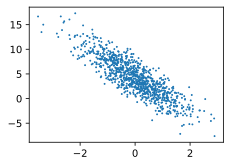

In [21]:
import torch
import random
from d2l import torch as d2l

def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0], '\nlabel:', labels[0])

d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(), 1)

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    #print(X, '\n', y)
    break
    
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def linreg(X, w, b):
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            
lr = 0.03 
num_epochs = 1
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
        
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

In [56]:
import numpy as np
import torch
from torch import nn
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

print(features.shape)
print(labels.shape)

# load data
def load_array(data_array, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_array)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)
    
# set batch_size
batch_size = 10
# set iter
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

# build network
net = nn.Sequential(nn.Linear(2, 1))
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)
print(net)
# define loss
loss = nn.MSELoss()
# optim
trainer = torch.optim.SGD(net.parameters(), lr=0.03)
# epoch
num_epoch = 3

for epoch in range(num_epoch):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss = {l:f}')

w = net[0].weight.data
print('error in estimating w:', true_w - w)
b = net[0].bias.data
print('error in estimating b:', true_b - b)

torch.Size([1000, 2])
torch.Size([1000, 1])
Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)
epoch 1, loss = 0.000174
epoch 2, loss = 0.000100
epoch 3, loss = 0.000101
error in estimating w: tensor([[ 0.0006, -0.0004]])
error in estimating b: tensor([0.0007])


In [63]:
x = torch.randn(2, 2)
y = torch.randn(2, 1)
z = np.matmul(x, y)
print(z)

tensor([[0.2526],
        [0.4538]])
